# Using Machine Learning to Predict NBA Games Winners

This jupyter notebook is an auxiliar material to my capstone project report in the Udacity's Machine Learning Engineer Nanodegree. The PDF file can be found in my GitHub repository:

* https://github.com/vilacham/capstone_report

---
## Importing data

As a first step, I will import the dataset and create a copy of it to work on:

In [58]:
# Import pandas
import pandas as pd

# Import dataset and create a copy of it
try:
    original_data = pd.read_excel('capstone_database.xlsx')
    data = original_data
    print('Dataset was successfully imported and has {} samples with {} features each.'.format(*data.shape))
except:
    print('Dataset could not be loaded. Is it missing?')

Dataset was successfully imported and has 36154 samples with 96 features each.


---
## Data preprocessing

Now that I have a copy of the dataset, my next steps are: 
* rename its columns;
* remove NaNs;
* deal with categorical data;
* create the label column; and
* drop unnecessary columns.

In [59]:
# Rename data columns
data.columns = ['DATE', 'A TEAM', 'H TEAM', 'osite', 'A PTS', 'H PTS', 'A STK', 'H STK', 'A PTS LG', 'A FGM LG', 'A FGA LG', 
                'A 3PM LG', 'A 3PA LG', 'A FTM LG', 'A FTA LG', 'A OREB LG', 'A DREB LG', 'A REB LG', 'A AST LG', 'A TOV LG', 
                'A STL LG', 'A BLK LG', 'H PTS LG', 'H FGM LG', 'H FGA LG', 'H 3PM LG', 'H 3PA LG', 'H FTM LG', 'H FTA LG', 
                'H OREB LG', 'H DREB LG', 'H REB LG', 'H AST LG', 'H TOV LG', 'H STL LG', 'H BLK LG', 'A PTS L2G', 'A FGM L2G', 
                'A FGA L2G', 'A 3PM L2G', 'A 3PA L2G', 'A FTM L2G', 'A FTA L2G', 'A OREB L2G', 'A DREB L2G', 'A REB L2G', 
                'A AST L2G', 'A TOV L2G', 'A STL L2G', 'A BLK L2G', 'H PTS L2G', 'H FGM L2G', 'H FGA L2G', 'H 3PM L2G', 
                'H 3PA L2G', 'H FTM L2G', 'H FTA L2G', 'H OREB L2G', 'H DREB L2G', 'H REB L2G', 'H AST L2G', 'H TOV L2G', 
                'H STL L2G', 'H BLK L2G', 'A PTS L5G', 'A FGM L5G', 'A FGA L5G', 'A 3PM L5G', 'A 3PA L5G', 'A FTM L5G', 
                'A FTA L5G', 'A OREB L5G', 'A DREB L5G', 'A REB L5G', 'A AST L5G', 'A TOV L5G', 'A STL L5G', 'A BLK L5G', 
                'H PTS L5G', 'H FGM L5G', 'H FGA L5G', 'H 3PM L5G', 'H 3PA L5G', 'H FTM L5G', 'H FTA L5G', 'H OREB L5G', 
                'H DREB L5G', 'H REB L5G', 'H AST L5G', 'H TOV L5G', 'H STL L5G', 'H BLK L5G', 'OVT', 'DAY', 'MTH', 'PLAYOFFS']

# Import numpy
import numpy as np

# Replace '-' and 'away' by NaN values and then replace it
data.replace(to_replace='-', value=np.nan, inplace=True, regex=True)
data.replace(to_replace='away', value=np.nan, inplace=True, regex=True)
data.dropna(inplace=True)
data.reset_index(inplace=True)

# Deal with 'DAY' and 'MTH' columns
data = pd.get_dummies(data, columns=['DAY', 'MTH'])

# Create label column (1 for home team win, 0 for visitor win)
data['WINNER'] = (data['H PTS'] > data['A PTS']).astype(int)

# Drop unecesary columns
columns_to_drop = ['index', 'DATE', 'A TEAM', 'H TEAM', 'osite', 'A PTS', 'H PTS']
data.drop(columns_to_drop, axis=1, inplace=True)

Now that I have only te features that I want in my dataset, I will make sure all of them are numerical.

In [60]:
# Convert all features to numerical
data = data.apply(pd.to_numeric)

In [61]:
# Import counter
from collections import Counter

# Drop outliers
counter = Counter()
for feature in data.iloc[:, 2:87].columns:
    quartile_1 = np.percentile(data[feature], 25)
    quartile_3 = np.percentile(data[feature], 75)
    step = (quartile_3 - quartile_1) * 1.5
    outliers = data[~((data[feature] >= quartile_1 - step) & (data[feature] <= quartile_3 + step))]
    print('{} outliers for the feature {}.'.format(len(outliers), feature))
    counter.update(outliers.index.values)
frequent_outliers = [outlier[0] for outlier in counter.items() if outlier[1] > 1]
print('{} outliers for more than one feature.'.format(len(frequent_outliers)))
good_data = data.drop(data.index[frequent_outliers]).reset_index(drop = True)
print("Original data had {} samples.".format(data.shape[0]))
print("New data has {} samples.".format(good_data.shape[0]))

110 outliers for the feature A PTS LG.
127 outliers for the feature A FGM LG.
157 outliers for the feature A FGA LG.
90 outliers for the feature A 3PM LG.
116 outliers for the feature A 3PA LG.
200 outliers for the feature A FTM LG.
185 outliers for the feature A FTA LG.
71 outliers for the feature A OREB LG.
147 outliers for the feature A DREB LG.
124 outliers for the feature A REB LG.
115 outliers for the feature A AST LG.
203 outliers for the feature A TOV LG.
584 outliers for the feature A STL LG.
461 outliers for the feature A BLK LG.
107 outliers for the feature H PTS LG.
121 outliers for the feature H FGM LG.
141 outliers for the feature H FGA LG.
93 outliers for the feature H 3PM LG.
127 outliers for the feature H 3PA LG.
173 outliers for the feature H FTM LG.
152 outliers for the feature H FTA LG.
62 outliers for the feature H OREB LG.
136 outliers for the feature H DREB LG.
210 outliers for the feature H REB LG.
103 outliers for the feature H AST LG.
172 outliers for the feat

In [62]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [63]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Define columns to standardize
columns_to_standardize = ['A PTS LG', 'A FGM LG', 'A FGA LG', 'A 3PM LG', 'A 3PA LG', 'A FTM LG', 'A FTA LG', 'A OREB LG', 
                          'A DREB LG', 'A REB LG', 'A AST LG', 'A TOV LG', 'A STL LG', 'A BLK LG', 'H PTS LG', 'H FGM LG', 
                          'H FGA LG', 'H 3PM LG', 'H 3PA LG', 'H FTM LG', 'H FTA LG', 'H OREB LG', 'H DREB LG', 'H REB LG', 
                          'H AST LG', 'H TOV LG', 'H STL LG', 'H BLK LG', 'A PTS L2G', 'A FGM L2G', 'A FGA L2G', 'A 3PM L2G', 
                          'A 3PA L2G', 'A FTM L2G', 'A FTA L2G', 'A OREB L2G', 'A DREB L2G', 'A REB L2G', 'A AST L2G', 
                          'A TOV L2G', 'A STL L2G', 'A BLK L2G', 'H PTS L2G', 'H FGM L2G', 'H FGA L2G', 'H 3PM L2G', 
                          'H 3PA L2G', 'H FTM L2G', 'H FTA L2G', 'H OREB L2G', 'H DREB L2G', 'H REB L2G', 'H AST L2G', 
                          'H TOV L2G', 'H STL L2G', 'H BLK L2G', 'A PTS L5G', 'A FGM L5G', 'A FGA L5G', 'A 3PM L5G', 
                          'A 3PA L5G', 'A FTM L5G', 'A FTA L5G', 'A OREB L5G', 'A DREB L5G', 'A REB L5G', 'A AST L5G', 
                          'A TOV L5G', 'A STL L5G', 'A BLK L5G', 'H PTS L5G', 'H FGM L5G', 'H FGA L5G', 'H 3PM L5G', 
                          'H 3PA L5G', 'H FTM L5G', 'H FTA L5G', 'H OREB L5G', 'H DREB L5G', 'H REB L5G', 'H AST L5G', 
                          'H TOV L5G', 'H STL L5G', 'H BLK L5G', 'OVT']

# Create scaler object
standard_scaler = StandardScaler()

# Avoid pandas warning
pd.options.mode.chained_assignment = None # default='warn'

# Standardize training and testing datasets
X_train.loc[:, columns_to_standardize] = standard_scaler.fit_transform(X_train[columns_to_standardize])
X_test.loc[:, columns_to_standardize] = standard_scaler.transform(X_test[columns_to_standardize])

In [64]:
# Divide training set and get last game data
X_train_last_game = X_train[list(X_train.columns[:30]) + list(X_train.columns[86:])]
X_test_last_game = X_test[list(X_test.columns[:30]) + list(X_test.columns[86:])]

# Divide training set and get last two games data
X_train_last_two_games = X_train[list(X_train.columns[:2]) + list(X_train.columns[30:58]) + list(X_train.columns[86:])]
X_test_last_two_games = X_test[list(X_test.columns[:2]) + list(X_test.columns[30:58]) + list(X_test.columns[86:])]

# Divide training set and get last five games data
X_train_last_five_games = X_train[list(X_train.columns[:2]) + list(X_train.columns[58:])]
X_test_last_five_games = X_test[list(X_test.columns[:2]) + list(X_test.columns[58:])]

---
## Last game

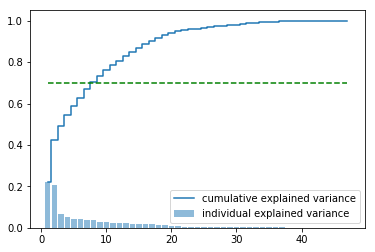

Number of components: 8


In [100]:
# 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of the last game data
pca = PCA(n_components=None)
X_train_last_game_pca = pca.fit_transform(X_train_last_game)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_exp = np.cumsum(explained_variance_ratio)
aux = 0
n_comp = 0
for i in range(len(cumulative_exp)):
    aux = cumulative_exp[i]
    if aux > 0.7:
        n_comp = i + 1
        break

plt.clf()
plt.bar(range(1, 48), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 48), cumulative_exp, where='mid', label='cumulative explained variance')
plt.plot(list(i for i in range(1, 48)), list(0.7 for i in range(1, 48)), '--', color='g')
plt.legend(loc='best')
plt.show()

print('Number of components: {}'.format(i + 1))

In [68]:
from capstone_report_functions import get_n_principal_components
n_comp = get_n_principal_components(X_train_last_game)
print(n_comp)

0
